In [47]:
# https://www.andersle.no/posts/2018/gpxplot/gpxplot.html

#http://andykee.com/visualizing-strava-tracks-with-python.html

file_gpx = 'activities/_DME_.gpx'


In [305]:
from os import listdir
from os.path import isfile, join
import gpxpy

def GpxToData(gpxfile):
    gpx_file = open(gpxfile, 'r')
    gpx = gpxpy.parse(gpx_file)
    
    activity = {}
    activity['time'] = gpx.time
    tracks = []
    for track_item in gpx.tracks:
        track = {}
        track['name'] = track_item.name
        track['type'] = track_item.type
        segments = []
        for segment_item in track_item.segments:
            segment = {}
            points = []
            for point_item in segment_item.points:
                point = []
                #print(point_item)
                #point.append(point.time)
                point.append(point_item.latitude)
                point.append(point_item.longitude)
                point.append(point_item.elevation)
                points.append(point)
            segment['points'] = points
            segments.append(segment)
        track['segments'] = segments
        tracks.append(track)
    activity['tracks'] = tracks
    
    return activity


def GetStravaDataFromDirFilesGPX(data_path):
    listfiles0 = [f for f in listdir(data_path) if isfile(join(data_path,f))]
    
    listfiles = []
    for num in range(len(listfiles0)):
        item = listfiles0[num]
        if ".gpx" in item:
            listfiles.append(item)
            
    #print(listfiles)
    
            
    activities = []
    for activity_here in listfiles:
        gpxfile = join(data_path,activity_here)
        
        print(gpxfile)
        activities.append(GpxToData(gpxfile)) 
        
    return activities



dir_gpx_files = 'activities'
data = GetStravaDataFromDirFilesGPX(dir_gpx_files)

print(len(data))


activities/2008513705.gpx
activities/+ ÐÐ¾ÑÐ¾Ð´ÐµÑ - ÐÐ¸Ð¶Ð½Ð¸Ð¹.gpx
activities/Ð£Ð³Ð»Ð¸Ñ - ÐÑÑÐºÐ¸Ð½ (last).gpx
activities/ÐÐ¸Ð¼ÑÑ Ð¸Ð»Ð¸ ÐÐµÐ»ÑÐ¹ Ð³Ð¾ÑÐ¾Ð´Ð¾Ðº - ÐÐµÑÐ±Ð¸Ð»ÐºÐ¸.gpx
activities/ÐÐ°Ð»ÑÐ·Ð¸Ð½ - Ð£Ð³Ð»Ð¸Ñ (last).gpx
activities/2324560968.gpx
activities/Ð ÑÐ±Ð½Ð¾Ðµ - ÐÐ¾Ð½ÑÑÐ°Ð½ÑÐ¸Ð½Ð¾Ð²Ð¾ - ÐÑÑÐ¾Ð²Ð¸ÑÑ.gpx
activities/2621450093.gpx
activities/ÐÐµÑÐ»Ñ - Ð¡ÑÐ·Ð´Ð°Ð»Ñ - ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ.gpx
activities/ÐÐ»ÐµÐºÑÐ°Ð½Ð´ÑÐ¾Ð² (last).gpx
activities/1686982019.gpx
activities/2702598567.gpx
activities/Ð¡ÐµÑÐ³Ð¸ÐµÐ² ÐÐ¾ÑÐ°Ð´ - ÐÐ±ÑÐ°Ð¼ÑÐµÐ²Ð¾ (last).gpx
activities/_17.gpx
activities/_55_.gpx
activities/2570446118.gpx
activities/2435936718.gpx
activities/1802901472.gpx
activities/2609640020.gpx
activities/ÐÐ»ÐµÑ - Ð®ÑÑÐµÐ²ÐµÑ.gpx
activities/1629672600.gpx
activities/1164565163.gpx
activities/ÐÐ»ÐµÐºÑÐ¸Ð½ - Ð¢Ð°ÑÑÑÐ° - Ð¡ÐµÑÐ¿ÑÑÐ¾Ð².gpx
activities/2668267617.gpx
activities/1199618385.gpx
activities/ÐÐ²ÐµÐ½Ð¸Ð³Ð¾ÑÐ¾Ð´ - ÐÐ¾Ð»Ð¸Ñ

In [315]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplleaflet

import datetime
import random

import matplotlib.patches as mpatches

lat = []
lon = []

fig = plt.figure(facecolor = '0.05')
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)




colors_red = [
    '#FFCC00',
    '#CC9933',
    '#FF6600',
    '#CC3300',
    '#CC3333',
    '#FF3366',
    '#993366',  
]

colors_no_red = [
    '#3300CC',
    '#0033FF',
    '#0099FF',
    '#003333',
    '#006633',
    '#00FF66',
    '#00CC00',
    '#669900',
    '#99CC00',
    '#666633',
]

color_current_year = 'crimson'
color_last_years = 'green'
color_future = 'mediumblue'


def setColorDepandOnTime(name, time):    
    color = color_last_years
    if time == None:
        if 'last' in name:
            return color_last_years
        
        return color_future
    
    if(activity['time'].year >= 2019):
        return color_current_year
    
    return color


for activity in data:
    #print(activity['time'].month)
    
    
    color_rout = setColorDepandOnTime(activity['tracks'][0]['name'], activity['time'])
        
    
    lat = []
    lon = []
    for track in activity['tracks']:
        for segment in track['segments']:
            for point in segment['points']:
                
                
                lat.append(point[0])
                lon.append(point[1])
                
    #plt.plot([lon[-1],lon[0]], [lat[-1],lat[0]], 'v', color=color_rout, markersize=12)
    scatter = plt.scatter([lon[-1],lon[0]], [lat[-1],lat[0]], marker='v', s = 300, c=color_rout, linewidths=2, edgecolors='w')
    scatter.set_urls(['http://www.bbc.co.uk/news', 'http://www.google.com', None])
    plt.plot(lon, lat, color = color_rout, lw = 3, alpha = 0.9)
    

#legends = []

#legends.append(mpatches.Patch(color=color_last_years, label='Past routes up to this year'))
#legends.append(mpatches.Patch(color=color_current_year, label='Completed routes this year'))
#legends.append(mpatches.Patch(color=color_future, label='Future routes'))
#plt.legend(handles=legends) 
    
    

mplleaflet.show()

    
#filename = data_path + '.png'
#plt.savefig(filename, facecolor = fig.get_facecolor(), bbox_inches='tight', pad_inches=0, dpi=300)

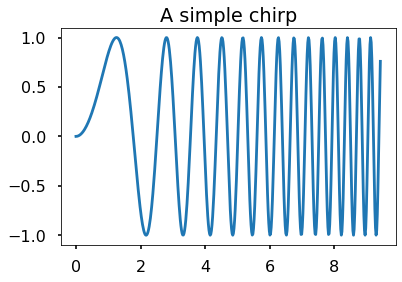

In [9]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

In [26]:
# import pandas as pd
import pandas as pd


lst = ['Geeks', 'For', 'Geeks', 'is', 
            'portal', 'for', 'Geeks']
 
    
df = pd.DataFrame(lst)
print(df[:2])


datadf = pd.DataFrame(data)
print(df[:2])

       0
0  Geeks
1    For
                0
0  2324560968.gpx
1  2621450093.gpx


In [28]:

def get_gpx_data(filename):
    gpx_file = open(filename, 'r')
    return gpxpy.parse(gpx_file)


dir_activities = 'activities'
subdir_this_year_activities = '2019'
subdir_past_activities = 'past'


data_2019 = get_gpx_data(dir_activities + '/' + subdir_this_year_activities)
data_past = get_gpx_data(dir_activities + '/' + subdir_this_year_activities)







In [42]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import gpxpy

import mplleaflet


data_path = 'act'
data = [f for f in listdir(data_path) if isfile(join(data_path,f))]

lat = []
lon = []

fig = plt.figure(facecolor = '0.05')
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)

for activity in data:
    gpx_filename = join(data_path,activity)
    gpx_file = open(gpx_filename, 'r')
    gpx = gpxpy.parse(gpx_file)

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                lat.append(point.latitude)
                lon.append(point.longitude)
    plt.plot(lon, lat, color = 'deepskyblue', lw = 0.2, alpha = 0.8)
    lat = []
    lon = []


mplleaflet.show()

#filename = data_path + '.png'
#plt.savefig(filename, facecolor = fig.get_facecolor(), bbox_inches='tight', pad_inches=0, dpi=300)

In [290]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np

import mplleaflet

# Load up the geojson data
filename = 'data'+ '/' + 'track.geojson'
with open(filename) as f:
    gj = json.load(f)

# Grab the coordinates (longitude, latitude) from the features, which we
# know are Points
xy = np.array([feat['geometry']['coordinates'] for feat in gj['features'][::10]])

print(len(xy))

xy = xy[150:]

# Plot the path as red dots connected by a blue line
#plt.hold(True)
plt.plot(xy[:,0], xy[:,1], 'r')
plt.plot(xy[:,0], xy[:,1], 'b.')

xp = xy[-1:,0]
yp = xy[-1:,1]

print(xp, yp)

#plt.plot(xy[:,0], xy[:,1], 'r')

#plt.scatter(xp, yp, s=1000, c=None, marker = 'v',linewidths=10, verts=None, edgecolors='g', zorder=10, alpha=0)
plt.scatter(xp, yp, marker='v', s = 500, c='w', alpha=0.8, linewidths=2, edgecolors='orange')



mapfile = 'output' + '.html'
# Create the map. Save the file to basic_plot.html. _map.html is the default
# if 'path' is not specified
mplleaflet.display()

205
[-71.10549108] [42.36471379]
